In [1]:
t2j(s) = s
function t2j(s::Tuple)
    a = (:block, :if, :tuple, :parameters, :kw, :quote, :(=), :(.=), :.)
    s[1] in a && return Expr(s[1], t2j.(s[2:end])...)
    s[1] === :lambda && return Expr(:(->), Expr(:tuple, s[2]...), t2j(s[3]))
    s[1] === :for && return Expr(s[1], Expr(:(=), t2j(s[2]), t2j(s[3])), t2j(s[4]))
    s[1] === :using && return Expr(s[1], Expr.(:., s[2:end])...)
    Expr(:call, t2j.(s)...)
end
macro tupp(x) t2j(Core.eval(__module__, x)) end

@tupp (macro with 1 method)

In [2]:
(:for, :k, (:(:), 1, 5),
    (:if, (:iseven, :k),
        (:println, "even: ", :k),
        (:println, "odd:  ", :k))) |> t2j

:(for k = 1:5
      if iseven(k)
          println("even: ", k)
      else
          println("odd:  ", k)
      end
  end)

In [3]:
@tupp (:for, :k, (:(:), 1, 5),
    (:if, (:iseven, :k),
        (:println, "even: ", :k),
        (:println, "odd:  ", :k)))

odd:  1
even: 2
odd:  3
even: 4
odd:  5


In [4]:
(:block,
    (:(=), :U, (:lambda, (:u,), (:u, :u))),
    (:(=), :F, (:lambda, (:u,), (:lambda, (:n, :a, :b),
                (:if, (:(==), :n, 0), :a,
                    ((:u, :u), (:-, :n, 1), :b, (:+, :a, :b)))))),
    (:(=), :Fib, (:U, :F)),
    (:for, :k, (:(:), 1, 10),
        (:println, "Fib(", :k, ") = ", (:Fib, :k, 0, 1)))) |> t2j

quote
    U = ((u,)->u(u))
    F = ((u,)->((n, a, b)->if n == 0
                    a
                else
                    (u(u))(n - 1, b, a + b)
                end))
    Fib = U(F)
    for k = 1:10
        println("Fib(", k, ") = ", Fib(k, 0, 1))
    end
end

In [5]:
@tupp (:block,
    (:(=), :U, (:lambda, (:u,), (:u, :u))),
    (:(=), :F, (:lambda, (:u,), (:lambda, (:n, :a, :b),
                (:if, (:(==), :n, 0), :a,
                    ((:u, :u), (:-, :n, 1), :b, (:+, :a, :b)))))),
    (:(=), :Fib, (:U, :F)),
    (:for, :k, (:(:), 1, 10),
        (:println, "Fib(", :k, ") = ", (:Fib, :k, 0, 1))))

Fib(1) = 1
Fib(2) = 1
Fib(3) = 2
Fib(4) = 3
Fib(5) = 5
Fib(6) = 8
Fib(7) = 13
Fib(8) = 21
Fib(9) = 34
Fib(10) = 55


In [6]:
(:block,
    (:using, :Plots),
    (:(=), :n, 20),
    (:(=), :x, (:range, 0, 2, (:kw, :length, :n))),
    (:(=), :y, (:+, (:., :sinpi, (:tuple, :x)), (:*, 0.2, (:randn, :n)))),
    (:(=), :xs, (:range, 0, 2, (:kw, :length, 200))),
    (:(=), :X, (:.^, :x, (:transpose, (:(:), 0, 3)))),
    (:(=), :b, (:\, :X, :y)),
    (:scatter, :x, :y, (:kw, :label, "sample")),
    (:plot!, :xs, (:., :sinpi, (:tuple, :xs)),
        (:kw, :label, "sinpi(x)"),
        (:kw, :color, (:quote, :black)),
        (:kw, :ls, (:quote, :dash))),
    (:plot!, :xs, (:., :evalpoly, (:tuple, :xs, (:Ref, :b))),
        (:kw, :label, "degree-3 polynomial"),
        (:kw, :color, 2), (:kw, :lw, 2))) |> t2j

quote
    using Plots
    n = 20
    x = range(0, 2, length = n)
    y = sinpi.(x) + 0.2 * randn(n)
    xs = range(0, 2, length = 200)
    X = x .^ transpose(0:3)
    b = X \ y
    scatter(x, y, label = "sample")
    plot!(xs, sinpi.(xs), label = "sinpi(x)", color = :black, ls = :dash)
    plot!(xs, evalpoly.(xs, Ref(b)), label = "degree-3 polynomial", color = 2, lw = 2)
end

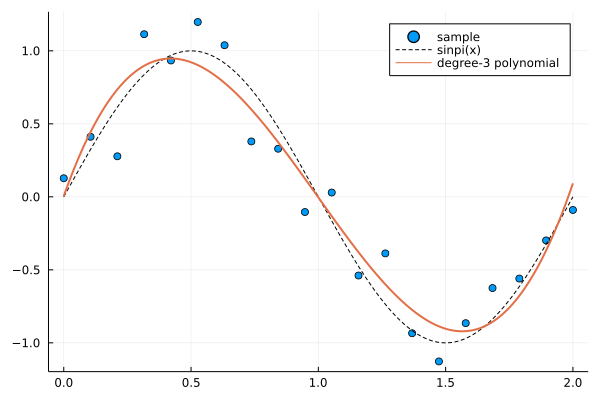

In [7]:
@tupp (:block,
    (:using, :Plots),
    (:(=), :n, 20),
    (:(=), :x, (:range, 0, 2, (:kw, :length, :n))),
    (:(=), :y, (:+, (:., :sinpi, (:tuple, :x)), (:*, 0.2, (:randn, :n)))),
    (:(=), :xs, (:range, 0, 2, (:kw, :length, 200))),
    (:(=), :X, (:.^, :x, (:transpose, (:(:), 0, 3)))),
    (:(=), :b, (:\, :X, :y)),
    (:scatter, :x, :y, (:kw, :label, "sample")),
    (:plot!, :xs, (:., :sinpi, (:tuple, :xs)),
        (:kw, :label, "sinpi(x)"),
        (:kw, :color, (:quote, :black)),
        (:kw, :ls, (:quote, :dash))),
    (:plot!, :xs, (:., :evalpoly, (:tuple, :xs, (:Ref, :b))),
        (:kw, :label, "degree-3 polynomial"),
        (:kw, :color, 2), (:kw, :lw, 2)))